# Sales Analysis

# Definitions

- **Total Revenue** - Total revenue in sales including the tax revenue. This is the total amount of money coming in including tax and without subtracting costs. This amounts to the sum of each sales transaction expressed as `Price * Quantity + State Tax`. **Note** `State Tax` is `(Price * Quantity) * State Tax Rate`, so combining the two expressions, `Total Revenue` could be described as `Price * Quantity * (1 + State Tax Rate)`

- **Gross Profit** - Total profit in sales after subtracting tax revenue and subtracting product costs. This amounts to the sum of each sales transaction (`(Price - Cost) * Quantity)`).

- **Net Profit** - Total profit in sales after subtracting additional business expenses. This is the total amount of money left after subtracting all costs. This amounts to the expression `Gross Profit for a Given Period - All Additional Business Expenses for a Given Period`.

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict

In [2]:
customers_df = pd.read_csv('https://cs.indstate.edu/~lmay1/assets/sales-data/customers.csv')

In [3]:
customers = customers_df.copy()
customers.head(2)

,CustomerId,FirstName,LastName,StreetAddress,City,State,Zip
0,1000,Christina,Wilkerson,881 Midland St,Appleton,WI,54911
1,1001,Arthur,Robles,543 Flanty Terr,Seattle,WA,98109


In [4]:
print(customers.State.unique())

['WI' 'WA' 'TX' 'CA' 'MN' 'IN' 'TN' 'VA' nan 'IL' 'KS' 'NJ' 'NY' 'IA' 'NC'
 'GA' 'MI' 'OH' 'FL' 'RI' 'PA' 'NE' 'AZ' 'CO' 'SC' 'MS' '60607' '66801'
 '10701' '94086' '78710' '07055' '44309' '24022' '27611' '75061' '48233'
 '55401']


In [5]:
print(customers.Zip.unique())

['54911' '98109' '76010' '94704' '94086' '55401' '78710' '46206' '37901'
 '75061' '23670' '98661' '60101' '66801' '07055' '91109' '33575' '10701'
 '50010' '07051' '67276' '46018' '28501' '53511' '30601' '27611' '48233'
 '44309' '62002' '44060' '30161' '33152' '02940' '24022' '16515' '60507'
 '44646' '13902' '31706' '07061' '46401' '27215' '68108' '53201' '12212'
 '85026' '45012' '45401' '75040' '77553' '99210' '80202' '29530' '75260'
 '60607' '23232' '32802' '39530' '13021' 'IL' '13504' 'KS' '38101' nan
 'NY' 'CA' 'TX' 'NJ' 'OH' 'VA' 'NC' 'MI' 'MN']


In [6]:
switched_cnt = 0
for i in range(len(customers)):
    x = customers['Zip'][i]
    try:
        if int(x):
            pass
    except:
        if x is not np.nan:
            switched_cnt += 1
            customers['Zip'][i], customers['State'][i] = customers['State'][i], customers['Zip'][i]

In [7]:
# Oroginal dataset
customers_df.to_csv('customers_df.csv')

# Final dataset
customers.to_csv('customers.csv')

In [8]:
customers.isnull().sum()

CustomerId        0
FirstName        66
LastName         40
StreetAddress     0
City              0
State            27
Zip              16
dtype: int64

In [9]:
features = []
percentages = []
for column in customers.columns:
    blanks = round((customers[column].isnull().sum()/1256)*100, 2)
    if blanks > 0:
        features.append(column)
        percentages.append(blanks)
#         print("Percent of {} fields are left blank : {}%.".format(column, blanks))

features.append('Zip_State_Switched')
percentages.append(round((switched_cnt/1256)*100, 2))
# print("Percent of Zip and State fields switched : ", round((switched_cnt/1256)*100, 2), '%.')

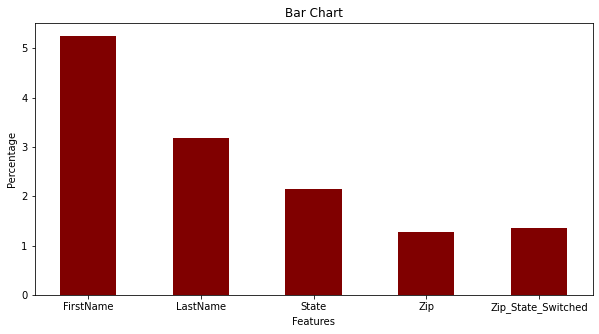

In [10]:
fig = plt.figure(figsize = (10, 5))
plt.bar(features, percentages, color='maroon', width=0.5)
plt.xlabel("Features")
plt.ylabel("Percentage")
plt.title("Bar Chart")
plt.show()

# Graphs

In [11]:
expenses_df = pd.read_csv('https://cs.indstate.edu/~lmay1/assets/sales-data/expenses.csv')
products_df = pd.read_csv('https://cs.indstate.edu/~lmay1/assets/sales-data/products.csv')
tax_df = pd.read_csv('https://cs.indstate.edu/~lmay1/assets/sales-data/tax.csv')

In [12]:
# State tax rate
state_tax_rates = dict()
for i in range(len(tax_df)):
    rate = tax_df.Rate[i]
    if rate is not np.nan:
        state_tax_rates[tax_df.State[i]] = float(tax_df.Rate[i][:-1])
    
# Products Cost, Price
product_price = dict()
product_cost = dict()
for i in range(len(products_df)):
    product = products_df.ProductId[i]
    product_price[product] = products_df.Price[i]
    product_cost[product] = products_df.Cost[i]

In [13]:
# Total Revenue
def totalRev(price, qnty, rate):
    return price*qnty*(45 + rate)/100

# Gross Profit 
def grossProfit(price, cost, qnty):
    return (price-cost)*qnty

# Net Profit
def netProfit(gross, expense):
    return gross-expense

In [14]:
# Product monthly revenue and Gross Profit

def product_monthly_revenue_and_gross_profit():
    tax_rate = 0
    for state in state_tax_rates.keys(): 
        tax_rate += state_tax_rates[state]
    
    product_month_rev = defaultdict(list)
    gross_profit = defaultdict(list)
    net_profit = defaultdict(list)
    
    for i in range(1, 13):
        if i < 10: 
            month_sales = pd.read_csv('https://cs.indstate.edu/~lmay1/assets/sales-data/sales-0'+ str(i) + '.csv')
        else: month_sales = pd.read_csv('https://cs.indstate.edu/~lmay1/assets/sales-data/sales-'+ str(i) + '.csv')

        # Products Quantity changes every month
        product_qnty = dict()
        for j in range(len(month_sales)):
            product = month_sales.ProductId[j]
            if product not in product_qnty: product_qnty[product] = 1
            else: product_qnty[product] += 1

        for product in products_df.ProductId:
            product_month_rev[product].append(totalRev(product_price[product], product_qnty[product], tax_rate))
            gross_profit[product].append(grossProfit(product_price[product], product_cost[product], product_qnty[product]))
            net_profit[product].append(netProfit(gross_profit[product][i-1], expenses_df.Expenses[i-1]))
            
    return product_month_rev, gross_profit, net_profit

In [15]:
%%time
product_month_rev, gross_profit, net_profit = product_monthly_revenue_and_gross_profit()

CPU times: user 853 ms, sys: 70 ms, total: 923 ms
Wall time: 22.6 s


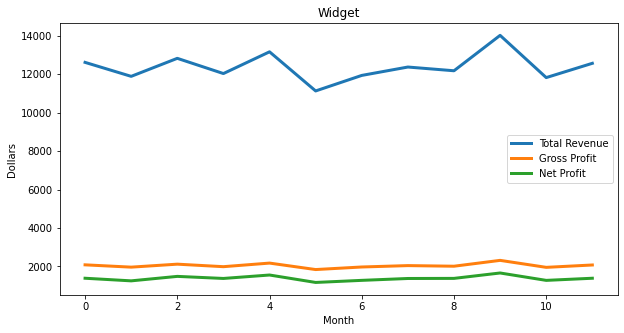

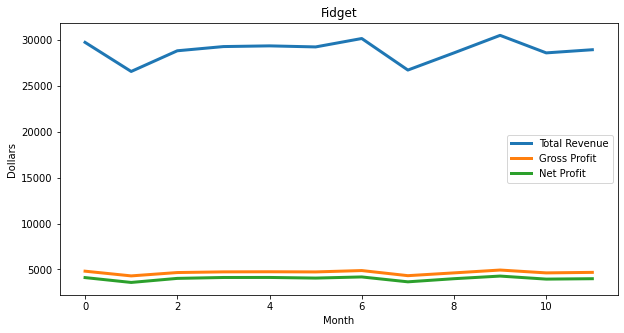

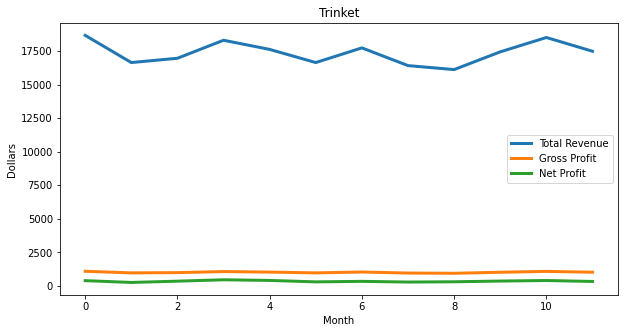

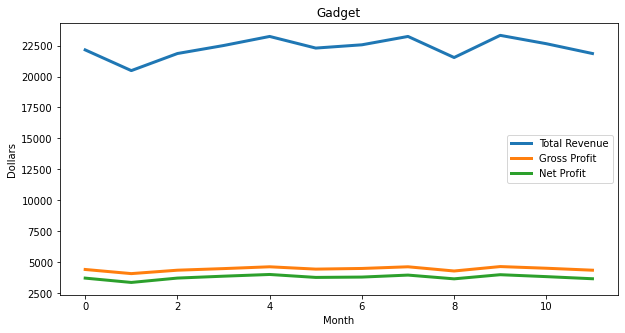

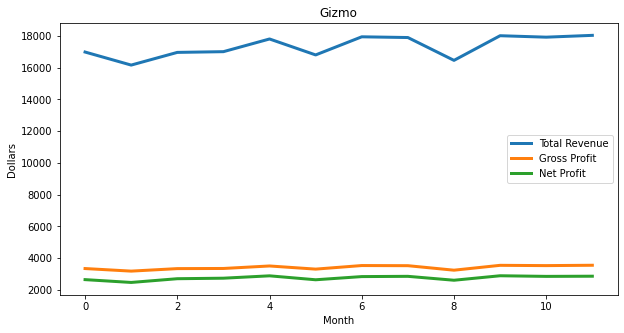

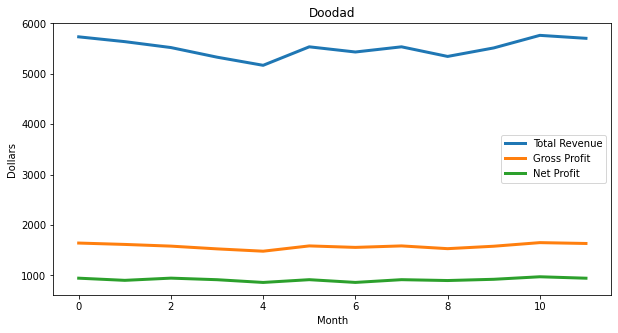

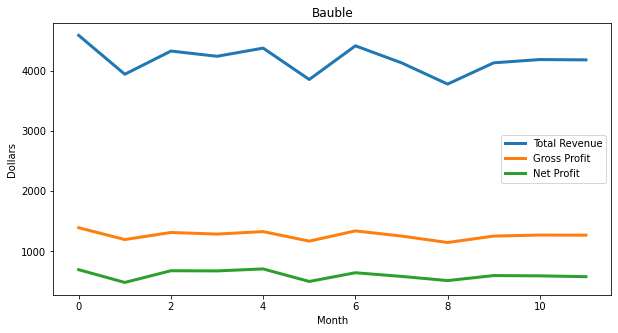

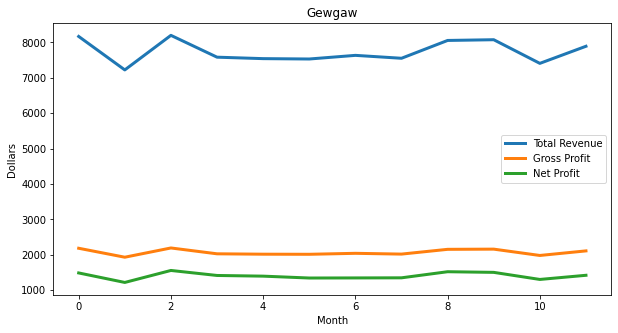

In [16]:
for product in products_df.ProductId:
    fig = plt.figure(figsize = (10, 5))
    plt.xlabel('Month')
    plt.ylabel('Dollars')
    plt.title(product)
    plt.plot(product_month_rev[product], label='Total Revenue', linewidth=3)
    plt.plot(gross_profit[product], label='Gross Profit', linewidth=3)
    plt.plot(net_profit[product], label='Net Profit', linewidth=3)
    plt.legend()
    net_max, net_min = max(net_profit[product]), min(net_profit[product])
#     plt.axhline(max(net_profit[product]))
#     plt.axhline(min(net_profit[product]))
    plt.legend()
    plt.show()